In [3]:
import os
os.chdir('..')
# os.chdir(os.path.dirname(__file__))
print(os.getcwd())

/workspace/rendering


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_specular_reflectance', 'compute_specular_lighting', 'device', 'diffuse_reflectance', 'generic_texture', 'load_state_dict', 'normal_map', 'roughness', 'specular_reflectance', 'state_dict', 'two_sided', 'use_vertex_color']
Scene construction, time: 0.00567 s
Forward pass, time: 0.12116 s


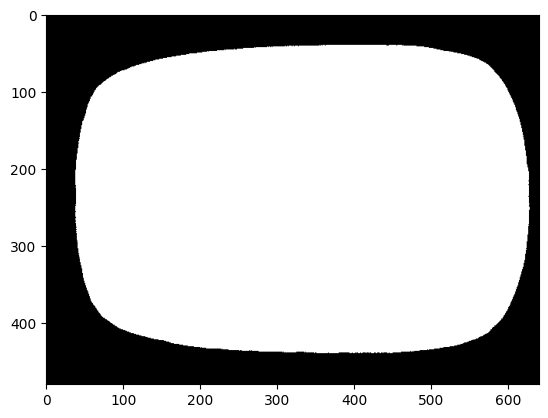

In [6]:
import pyredner # pyredner will be the main Python module we import for redner.
import torch # We also import PyTorch

objects = pyredner.load_obj('data/models/021_bleach_cleanser/textured_simple.obj', return_objects=True)
print(dir(objects[0].material))

camera = pyredner.automatic_camera_placement(objects, resolution=(480, 640))
scene = pyredner.Scene(camera = camera, objects = objects)
light = pyredner.PointLight(
            # position = (camera.position + torch.tensor((0.0, 0.0, 100.0))).to(pyredner.get_device()),
            position = camera.position.to(pyredner.get_device()),
            intensity = torch.tensor((20000.0, 30000.0, 20000.0), 
            device = pyredner.get_device()))
# img = pyredner.render_albedo(scene)
img = pyredner.render_deferred(scene, lights=[light])

# Visualize img
from matplotlib.pyplot import imshow
%matplotlib inline
# Need to gamma compress the image for displaying.
imshow(torch.pow(img, 1.0/2.2).cpu())

In [5]:
from utils.utils import load_ho_meta
from utils.mano import ManoLayer

anno = load_ho_meta('data/HO3D_v3/train/ABF10/meta/0000.pkl')
mano = ManoLayer()
mano_verts = mano(anno)

/workspace/rendering/utils/utils.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v is None or v == 'None':


In [7]:
mano_object = pyredner.Object(
    vertices=mano_verts[0], 
    indices=mano.faces, 
    material=pyredner.Material(
        diffuse_reflectance=pyredner.Texture(mano.map.to(pyredner.get_device()))
        # diffuse_reflectance=torch.tensor((0.5, 0.5, 0.5), device=pyredner.get_device())))
    )
)
print(mano.faces.dtype)

scene = pyredner.Scene(camera = camera, objects = [mano_object])
# Render the scene.
img = pyredner.render_albedo(scene)
    

torch.int32
Scene construction, time: 0.01186 s
Forward pass, time: 0.04696 s


/opt/conda/envs/render-hand/lib/python3.7/site-packages/pyredner/render_pytorch.py:214: UserWarning: Converting shape vertices from cpu to cuda:0, this can be inefficient.
  warnings.warn('Converting shape vertices from {} to {}, this can be inefficient.'.format(shape.vertices.device, device))
/opt/conda/envs/render-hand/lib/python3.7/site-packages/pyredner/render_pytorch.py:216: UserWarning: Converting shape indices from cpu to cuda:0, this can be inefficient.
  warnings.warn('Converting shape indices from {} to {}, this can be inefficient.'.format(shape.indices.device, device))
